##  Introduction

The purpose of this notebook is to explore the PySC2 environment in code such that we understand how to interact with the environment.

### For details about the arguments to pass into sc2_env.SC2Env
https://github.com/deepmind/pysc2/blob/master/pysc2/env/sc2_env.py#L98

In [1]:
import sys

# Apparently jupyter notebook passes some command line arguments. The -f flag confuses the pysc2
# library which will result in an error. Removing that argument is a hacky way to get through
# this. Also make this change to pysc2 library: https://github.com/chris-chris/pysc2-examples/issues/5
print(sys.argv)
sys.argv[1:] = []

from pysc2.env import sc2_env
from pysc2.lib import actions
import json

step_mul = 8
_SELECT_ARMY = actions.FUNCTIONS.select_army.id
_SELECT_ALL = [0]
#_SELECT_POINT = actions.FUNCTIONS.select_point.id
#_SELECT_POINT_ACT = [0]
#_SCREEN = [0, 0]

# manually init environment
env = sc2_env.SC2Env(
    map_name="DefeatZerglingsAndBanelings",
    step_mul=step_mul,
    rgb_screen_size=264,
    rgb_minimap_size=64,
    #feature_screen_size=64,
    #feature_minimap_size=64,
    #action_space=actions.ActionSpace.RGB
)
observation_spec = env.observation_spec()
action_spec = env.action_spec()
env_start = env.reset() # resets the episode
#env_step = env.step(actions=[actions.FunctionCall(_SELECT_ARMY, [_SELECT_ALL])])
'''
while(true):
    obs = env_step[0].observation
    function_id = numpy.random.choice(obs.observation.available_actions)
    args = [[numpy.random.randint(0, size) for size in arg.sizes]
            for arg in self.action_spec.functions[function_id].args]
    env_step = env.step(actions=actions.FunctionCall(function_id, args))
'''
app.run(main)
env.close()
obs = env_start[0].observation

for action in obs.available_actions:
    print(actions.FUNCTIONS[action])
#actionsPrinter = AvailableActionsPrinter(env)
#actionsPrinter.step()
#env_start = env.reset() # resets the episode
#env_step = env.step(actions=[actions.FunctionCall(_SELECT_ARMY, [_SELECT_ALL])]) # pass in action to carry out and then get info for next state

['C:\\Users\\Yimang\\Miniconda3\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Yimang\\AppData\\Roaming\\jupyter\\runtime\\kernel-a7381985-f82c-4e6f-900e-4a759fa0204c.json']


E0529 21:12:39.686711  1484 _logging.py:53] close status: 16896
W0529 21:12:42.981550  1484 sc_process.py:182] Killing the process.


0/no_op ()
1/move_camera (1/minimap [0, 0])
2/select_point (6/select_point_act [4]; 0/screen [0, 0])
3/select_rect (7/select_add [2]; 0/screen [0, 0]; 2/screen2 [0, 0])
4/select_control_group (4/control_group_act [5]; 5/control_group_id [10])
5/select_unit (8/select_unit_act [4]; 9/select_unit_id [500])
453/Stop_quick (3/queued [2])
7/select_army (7/select_add [2])
451/Smart_screen (3/queued [2]; 0/screen [0, 0])
452/Smart_minimap (3/queued [2]; 1/minimap [0, 0])
331/Move_screen (3/queued [2]; 0/screen [0, 0])
332/Move_minimap (3/queued [2]; 1/minimap [0, 0])
333/Patrol_screen (3/queued [2]; 0/screen [0, 0])
334/Patrol_minimap (3/queued [2]; 1/minimap [0, 0])
12/Attack_screen (3/queued [2]; 0/screen [0, 0])
13/Attack_minimap (3/queued [2]; 1/minimap [0, 0])
274/HoldPosition_quick (3/queued [2])


In [6]:
env.close()

In [84]:
# examine beginning env
print("type(env_start):", type(env_start))
print("len(env_start):", len(env_start))
print("type(env_start[0]):", type(env_start[0]))
timestep = env_start[0]
print("type(timestep.step_type):", type(timestep.step_type))
print("timestep.step_type:", timestep.step_type)
print("type(timestep.reward):", type(timestep.reward))
print("timestep.reward:", timestep.reward)
print("type(timestep.discount):", type(timestep.discount))
print("timestep.discount:", timestep.discount)
#print(timestep.observation)
obs = timestep.observation

type(env_start): <class 'tuple'>
len(env_start): 1
type(env_start[0]): <class 'pysc2.env.environment.TimeStep'>
type(timestep.step_type): <enum 'StepType'>
timestep.step_type: StepType.FIRST
type(timestep.reward): <class 'int'>
timestep.reward: 0
type(timestep.discount): <class 'float'>
timestep.discount: 1.0


TimeStep Attributes: https://github.com/deepmind/pysc2/blob/master/pysc2/env/environment.py
Attributes:
- step_type: A `StepType` enum value.
- reward: A scalar, or `None` if `step_type` is `StepType.FIRST`, i.e. at the start of a sequence.
- discount: A discount value in the range `[0, 1]`, or `None` if `step_type` is `StepType.FIRST`, i.e. at the start of a sequence.
- observation: A NumPy array, or a dict, list or tuple of arrays.



In [85]:
print(type(obs))
for k,v in obs.items():
    print(k)
# https://github.com/deepmind/pysc2/blob/master/docs/environment.md for details about each of
# the below keys

<class 'pysc2.lib.named_array.NamedDict'>
single_select
multi_select
build_queue
cargo
cargo_slots_available
rgb_screen
rgb_minimap
last_actions
action_result
alerts
game_loop
score_cumulative
player
control_groups
available_actions


(264, 264, 3)
<class 'numpy.ndarray'>
[[[ 8 17 17]
  [ 8 18 19]
  [ 8 17 17]
  ..., 
  [ 7 16 15]
  [ 6 16 15]
  [ 7 17 16]]

 [[ 8 18 18]
  [ 8 17 17]
  [ 9 18 18]
  ..., 
  [ 6 16 16]
  [ 6 16 15]
  [ 7 18 17]]

 [[ 8 18 18]
  [ 8 18 18]
  [ 8 17 16]
  ..., 
  [ 6 17 15]
  [ 7 17 17]
  [ 7 17 17]]

 ..., 
 [[ 4 16 14]
  [ 4 15 13]
  [ 5 15 13]
  ..., 
  [ 5 15 14]
  [ 4 14 13]
  [ 4 14 13]]

 [[ 4 17 15]
  [ 4 16 14]
  [ 5 16 14]
  ..., 
  [ 7 16 15]
  [ 5 14 13]
  [ 5 15 13]]

 [[ 4 15 13]
  [ 4 15 13]
  [ 5 15 13]
  ..., 
  [ 5 15 14]
  [ 4 14 13]
  [ 5 15 14]]]


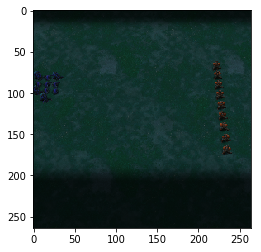

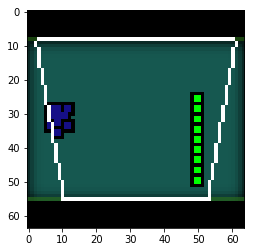

In [86]:
from matplotlib import pyplot as PLT
import numpy as np
print(obs["rgb_screen"].shape)
print(type(obs["rgb_screen"]))
print(obs["rgb_screen"])

screen = obs["rgb_screen"].astype(np.uint8)
minimap = obs["rgb_minimap"].astype(np.uint8)
PLT.imshow(screen)
PLT.show()
PLT.imshow(minimap)
PLT.show()

In [87]:
print(type(obs["single_select"]))
obs["single_select"]

<class 'pysc2.lib.named_array.NamedNumpyArray'>


NamedNumpyArray([[0, 0, 0, 0, 0, 0, 0]], [None, ['unit_type', 'player_relative', 'health', 'shields', 'energy', 'transport_slots_taken', 'build_progress']])

In [88]:
# The above is a NamedNumpyArray. You can access an element by its index or the specified name.
obs["single_select"][0]["unit_type"]

0

In [89]:
# print human-readable list of available actions
for action in obs.available_actions:
    print(actions.FUNCTIONS[action])

0/no_op ()
1/move_camera (1/minimap [0, 0])
2/select_point (6/select_point_act [4]; 0/screen [0, 0])
3/select_rect (7/select_add [2]; 0/screen [0, 0]; 2/screen2 [0, 0])
4/select_control_group (4/control_group_act [5]; 5/control_group_id [10])
5/select_unit (8/select_unit_act [4]; 9/select_unit_id [500])
453/Stop_quick (3/queued [2])
7/select_army (7/select_add [2])
451/Smart_screen (3/queued [2]; 0/screen [0, 0])
452/Smart_minimap (3/queued [2]; 1/minimap [0, 0])
331/Move_screen (3/queued [2]; 0/screen [0, 0])
332/Move_minimap (3/queued [2]; 1/minimap [0, 0])
333/Patrol_screen (3/queued [2]; 0/screen [0, 0])
334/Patrol_minimap (3/queued [2]; 1/minimap [0, 0])
12/Attack_screen (3/queued [2]; 0/screen [0, 0])
13/Attack_minimap (3/queued [2]; 1/minimap [0, 0])
274/HoldPosition_quick (3/queued [2])


In [91]:
obs2 = env_step[0].observation

for action in obs2.available_actions:
    print(action)
    print(actions.FUNCTIONS[action])
    
# looks like the available actions are the same after selecting army

0
0/no_op ()
1
1/move_camera (1/minimap [0, 0])
2
2/select_point (6/select_point_act [4]; 0/screen [0, 0])
3
3/select_rect (7/select_add [2]; 0/screen [0, 0]; 2/screen2 [0, 0])
4
4/select_control_group (4/control_group_act [5]; 5/control_group_id [10])
5
5/select_unit (8/select_unit_act [4]; 9/select_unit_id [500])
453
453/Stop_quick (3/queued [2])
7
7/select_army (7/select_add [2])
451
451/Smart_screen (3/queued [2]; 0/screen [0, 0])
452
452/Smart_minimap (3/queued [2]; 1/minimap [0, 0])
331
331/Move_screen (3/queued [2]; 0/screen [0, 0])
332
332/Move_minimap (3/queued [2]; 1/minimap [0, 0])
333
333/Patrol_screen (3/queued [2]; 0/screen [0, 0])
334
334/Patrol_minimap (3/queued [2]; 1/minimap [0, 0])
12
12/Attack_screen (3/queued [2]; 0/screen [0, 0])
13
13/Attack_minimap (3/queued [2]; 1/minimap [0, 0])
274
274/HoldPosition_quick (3/queued [2])


In [33]:
print(action_spec[0].functions[2].args[0].sizes)
print(action_spec[0].types.minimap)

(4,)
1/minimap [64, 64]


In [17]:
type(action_spec[0].functions)

pysc2.lib.actions.Functions